In [15]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-v0_8-darkgrid')

In [16]:
rawBostonData = pd.read_csv\
                ('https://raw.githubusercontent.com/'\
                'PacktWorkshops/The-Data-Science-'\
                'Workshop/master/Chapter02/'\
                'Dataset/Boston.csv')
rawBostonData = rawBostonData.dropna()
rawBostonData = rawBostonData.drop_duplicates()


In [17]:
renamedBoastonData = rawBostonData.rename\
                     (columns = {\
                     'CRIM':'crimeRatePerCapita',\
                     'ZN ':'landOver25K_sqft',\
                     'INDUS ':'non-retailLandProptn',\
                     'CHAS':'riverDummy',\
                     'NOX': 'nitrixOxide_pp10m',\
                     'RM':'AvgNo.RoomsPerDwelling',\
                     'AGE':'ProptnOwnerOccupied',\
                     'DIS':'weightedDist',\
                     'RAD':'radialHighwaysAccess',\
                     'TAX':'propTaxRate_per10K',\
                     'PTRATIO':'pupilTeacherRatio',\
                     'LSTAT':'pctLowerStatus',\
                     'MEDV':'medianValue_Ks'})

In [18]:
X=renamedBoastonData.drop('crimeRatePerCapita', axis = 1)
y=renamedBoastonData[['crimeRatePerCapita']]
seed = 10
test_data_size = 0.3
X_train, X_test, y_train,y_test = train_test_split\
                                  (X, y, \
                                  test_size = test_data_size,\
                                  random_state = seed)
train_data = pd.concat([X_train, y_train],axis = 1)
test_data= pd.concat([X_test, y_test], axis = 1)

In [21]:
sns.regplot(x='medianValue_Ks', y='crimeRatePerCapita', \
           ci=None, data=train_data, ax=ax, color='k', \
           scatter_kws={"s": 20, "color": "royalblue", \
           "alpha":1})

<Axes: xlabel='medianValue_Ks', ylabel='crimeRatePerCapita'>

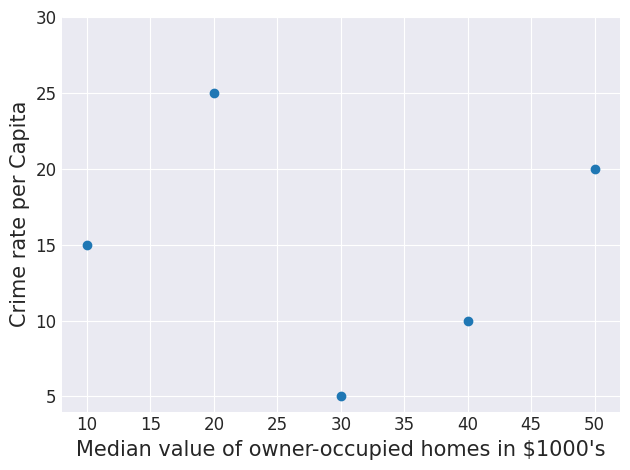

In [20]:
x = [10, 20, 30, 40, 50]
y = [15, 25, 5, 10, 20] 
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_ylabel('Crime rate per Capita', fontsize=15, \
               fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes "\
              "in $1000's", fontsize=15, \
              fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=30)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()
plt.show()

**A POSSIBLE LOG-LINEAR RELATIONSHIP USING PYTHON**

In [22]:
y = np.log(train_data['crimeRatePerCapita'])

In [23]:
sns .regplot(x='medianValue_Ks', y=y, ci=95, \
             data=train_data, ax=ax, color='k', \
             scatter_kws={"s": 20,"color": "royalblue", \
             "alpha":1})

<Axes: xlabel='medianValue_Ks', ylabel='crimeRatePerCapita'>

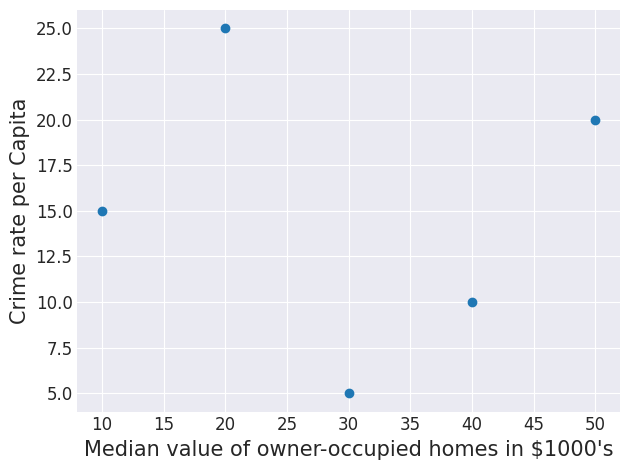

In [24]:
x = [10, 20, 30, 40, 50]
y = [15, 25, 5, 10, 20] 
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_ylabel('Crime rate per Capita', fontsize=15, \
               fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes "\
              "in $1000's", fontsize=15, \
              fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()
plt.show()

**FITTING A SIMPLE LINEAR REGRESSION MODEL USING THE STATSMODELS FORMULA API**

In [25]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [27]:
linearModel = smf.ols\
              (formula='crimeRatePerCapita ~ medianValue_Ks',\
               data=train_data)

In [28]:
linearModelResult = linearModel.fit()

In [29]:
print(linearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     59.02
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.56e-13
Time:                        04:28:12   Log-Likelihood:                -1217.4
No. Observations:                 354   AIC:                             2439.
Df Residuals:                     352   BIC:                             2447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.2094      1.079     10.

**MULTIPLE LINEAR REGRESSION**

In [30]:
multiLinearModel = smf.ols\
                    (formula = 'crimeRatePerCapita \
                                ~ pctLowerStatus \
                                + radialHighwaysAccess \
                                + medianValue_Ks \
                                + nitrixOxide_pp10m', \
                                data=train_data)

In [35]:
multiLinearModResult = multiLinearModel.fit()

In [36]:
print(multiLinearModResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     57.77
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           2.19e-37
Time:                        04:46:57   Log-Likelihood:                -1154.9
No. Observations:                 354   AIC:                             2320.
Df Residuals:                     349   BIC:                             2339.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8912 